Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/fjthrput/'

N = 10_000
A = 50_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}7/throughput_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}7/throughput_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}7/throughput_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}7/throughput_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 1 15:31:43 2025 +0200) (509.53ms elap...,0.478,0.0248,0.479,1.07,0.25,15.13,47.35 C,Nominal
1,(Tue Apr 1 15:31:44 2025 +0200) (507.55ms elap...,1.340,0.0593,0.529,1.95,0.37,26.17,47.35 C,Nominal
2,(Tue Apr 1 15:31:44 2025 +0200) (506.63ms elap...,0.540,0.0251,0.583,1.16,0.34,27.06,47.02 C,Nominal
3,(Tue Apr 1 15:31:45 2025 +0200) (508.34ms elap...,0.327,0.0196,0.486,0.88,0.21,14.37,47.02 C,Nominal
4,(Tue Apr 1 15:31:45 2025 +0200) (509.25ms elap...,0.239,0.0330,0.450,0.75,0.16,11.49,46.62 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(1136, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 1 15:31:55 2025 +0200) (1009.54ms ela...,35.9,0.0454,1.310,38.47,3.97,99.44,50.04 C,Nominal
1,(Tue Apr 1 15:31:56 2025 +0200) (1005.11ms ela...,26.9,0.0302,0.718,30.02,3.95,99.11,52.10 C,Nominal
2,(Tue Apr 1 15:31:57 2025 +0200) (1005.47ms ela...,27.5,0.0418,0.737,30.62,3.96,99.32,53.76 C,Nominal
3,(Tue Apr 1 15:31:58 2025 +0200) (1005.24ms ela...,26.4,0.0342,0.761,29.51,3.96,99.28,55.02 C,Nominal
4,(Tue Apr 1 15:31:59 2025 +0200) (1005.02ms ela...,25.9,0.0334,0.746,29.05,3.97,99.45,56.18 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 1 15:54:53 2025 +0200) (511.29ms elap...,0.2100,0.000,0.245,0.31,0.06,4.78,48.27 C,Nominal
1,(Tue Apr 1 15:54:54 2025 +0200) (509.28ms elap...,1.1400,0.031,0.393,1.36,0.19,16.92,48.27 C,Nominal
2,(Tue Apr 1 15:54:54 2025 +0200) (508.07ms elap...,0.2310,0.000,0.262,0.31,0.05,3.42,48.34 C,Nominal
3,(Tue Apr 1 15:54:55 2025 +0200) (506.95ms elap...,0.0523,0.000,0.243,0.13,0.03,2.41,48.34 C,Nominal
4,(Tue Apr 1 15:54:55 2025 +0200) (507.99ms elap...,0.3210,0.000,0.323,0.54,0.18,8.07,48.36 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(5825, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 1 15:55:05 2025 +0200) (1008.06ms ela...,26.3,0.0,0.654,27.00,3.63,97.08,52.20 C,Nominal
1,(Tue Apr 1 15:55:06 2025 +0200) (1004.52ms ela...,26.6,0.0,0.677,27.32,3.68,97.36,55.30 C,Nominal
2,(Tue Apr 1 15:55:07 2025 +0200) (1004.85ms ela...,26.0,0.0,0.654,26.69,3.57,96.92,57.63 C,Nominal
3,(Tue Apr 1 15:55:08 2025 +0200) (1004.84ms ela...,26.2,0.0,0.642,26.85,3.58,96.46,59.52 C,Nominal
4,(Tue Apr 1 15:55:09 2025 +0200) (1004.78ms ela...,29.3,0.0,0.816,30.04,3.83,98.89,61.66 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-01 15:31:43,0.478,0.0248,0.479,1.07,0.25,15.13,47.35,Nominal,509.53
1,2025-04-01 15:31:44,1.340,0.0593,0.529,1.95,0.37,26.17,47.35,Nominal,507.55
2,2025-04-01 15:31:44,0.540,0.0251,0.583,1.16,0.34,27.06,47.02,Nominal,506.63
3,2025-04-01 15:31:45,0.327,0.0196,0.486,0.88,0.21,14.37,47.02,Nominal,508.34
4,2025-04-01 15:31:45,0.239,0.0330,0.450,0.75,0.16,11.49,46.62,Nominal,509.25


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(1136, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-01 15:31:55,35.9,0.0454,1.310,38.47,3.97,99.44,50.04,Nominal,1009.54
1,2025-04-01 15:31:56,26.9,0.0302,0.718,30.02,3.95,99.11,52.10,Nominal,1005.11
2,2025-04-01 15:31:57,27.5,0.0418,0.737,30.62,3.96,99.32,53.76,Nominal,1005.47
3,2025-04-01 15:31:58,26.4,0.0342,0.761,29.51,3.96,99.28,55.02,Nominal,1005.24
4,2025-04-01 15:31:59,25.9,0.0334,0.746,29.05,3.97,99.45,56.18,Nominal,1005.02


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-01 15:54:53,0.2100,0.000,0.245,0.31,0.06,4.78,48.27,Nominal,511.29
1,2025-04-01 15:54:54,1.1400,0.031,0.393,1.36,0.19,16.92,48.27,Nominal,509.28
2,2025-04-01 15:54:54,0.2310,0.000,0.262,0.31,0.05,3.42,48.34,Nominal,508.07
3,2025-04-01 15:54:55,0.0523,0.000,0.243,0.13,0.03,2.41,48.34,Nominal,506.95
4,2025-04-01 15:54:55,0.3210,0.000,0.323,0.54,0.18,8.07,48.36,Nominal,507.99


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(5825, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-01 15:55:05,26.3,0.0,0.654,27.00,3.63,97.08,52.20,Nominal,1008.06
1,2025-04-01 15:55:06,26.6,0.0,0.677,27.32,3.68,97.36,55.30,Nominal,1004.52
2,2025-04-01 15:55:07,26.0,0.0,0.654,26.69,3.57,96.92,57.63,Nominal,1004.85
3,2025-04-01 15:55:08,26.2,0.0,0.642,26.85,3.58,96.46,59.52,Nominal,1004.84
4,2025-04-01 15:55:09,29.3,0.0,0.816,30.04,3.83,98.89,61.66,Nominal,1004.78


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


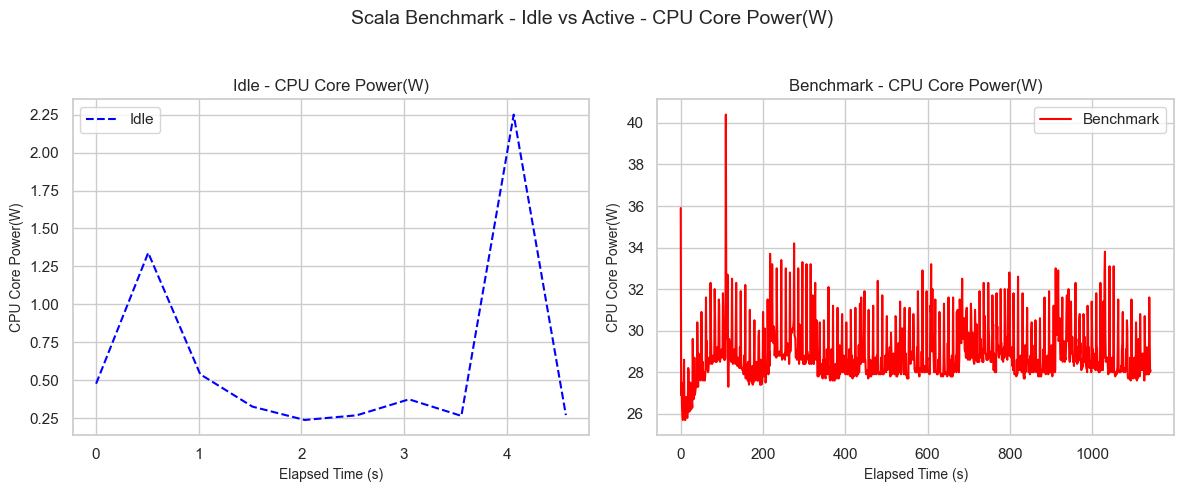

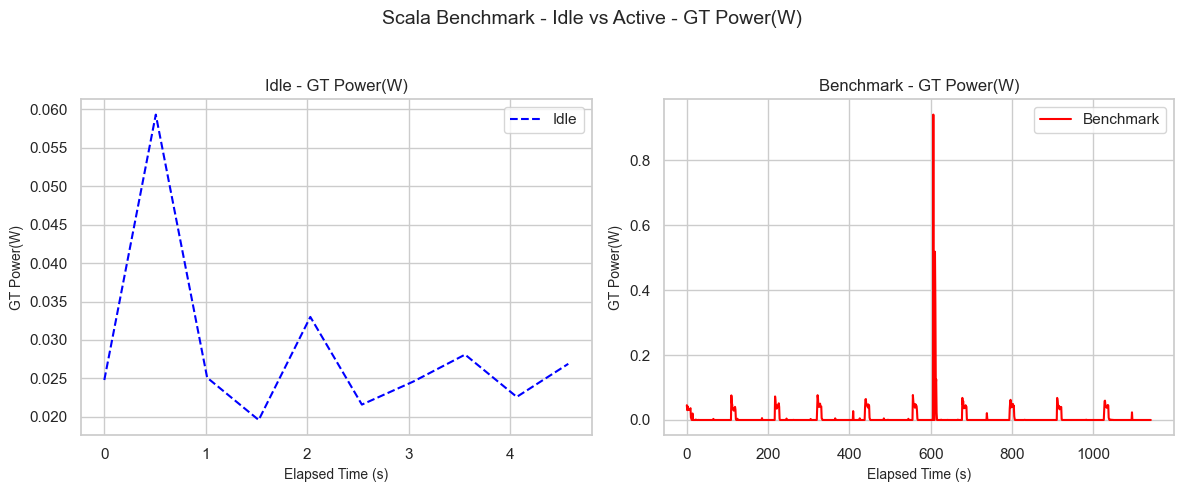

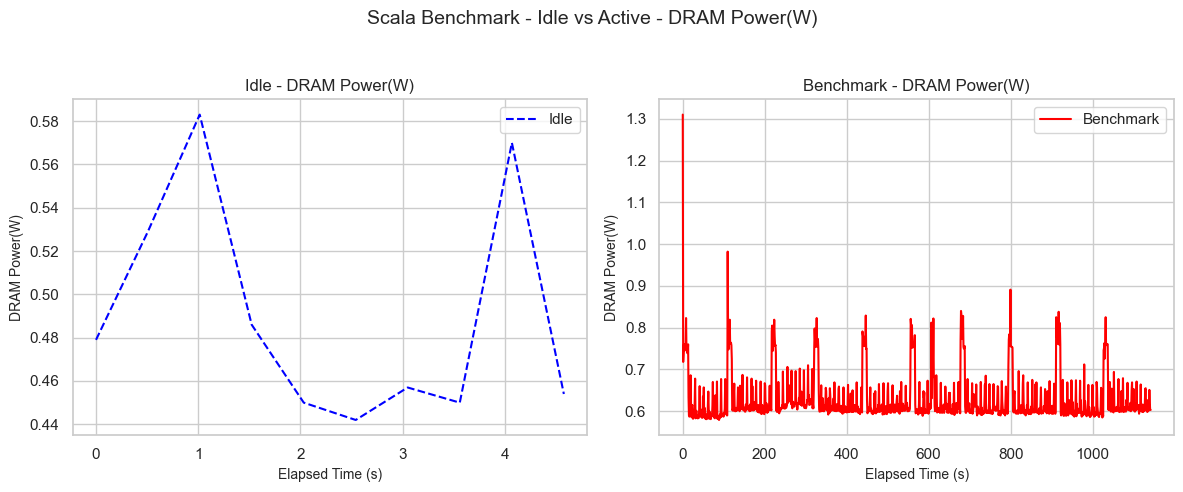

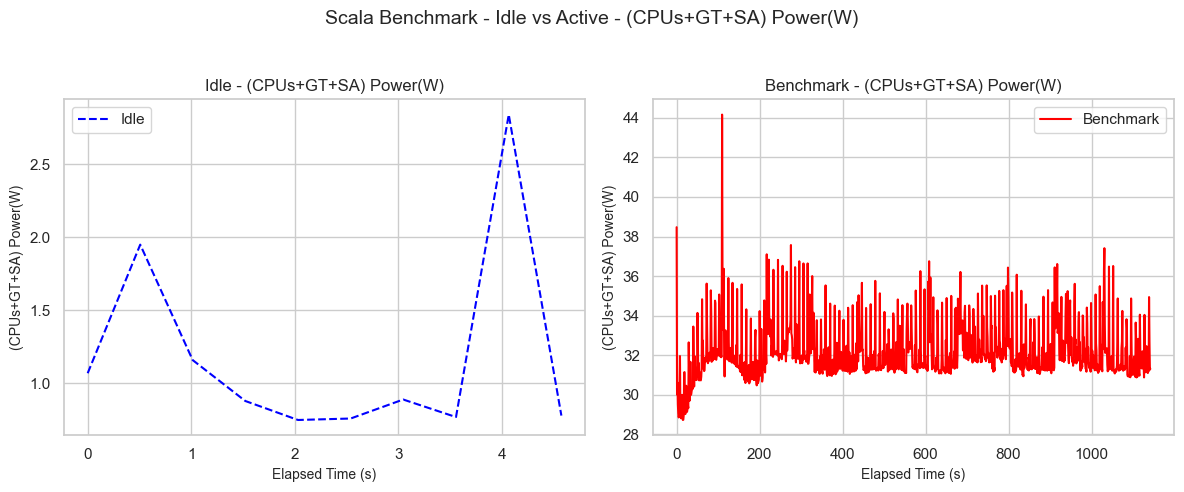

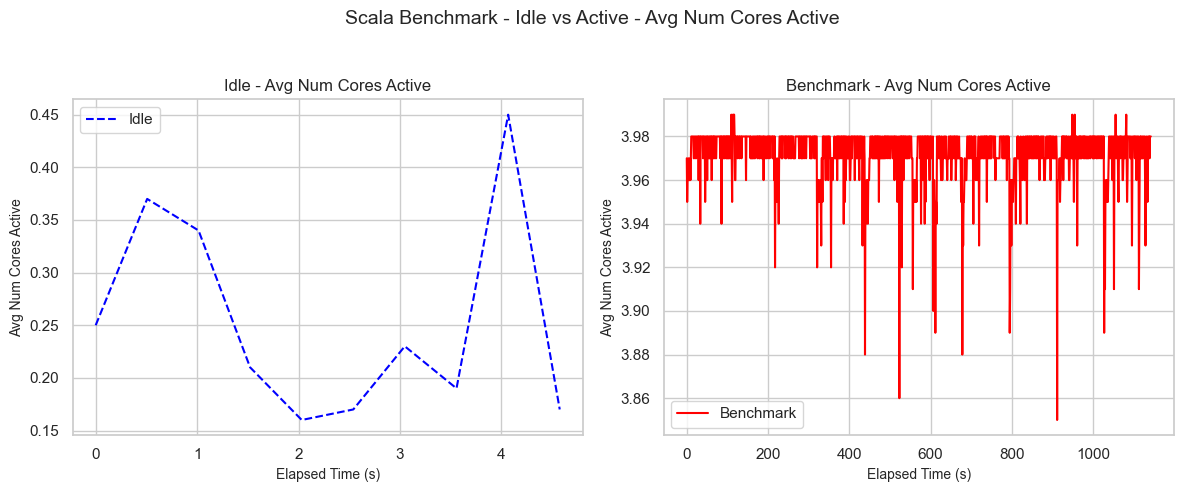

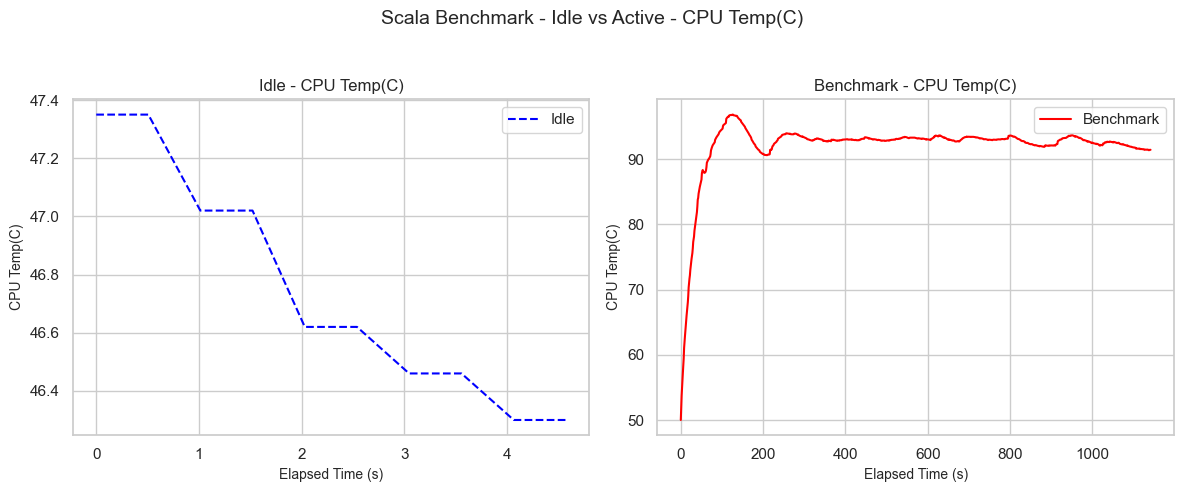

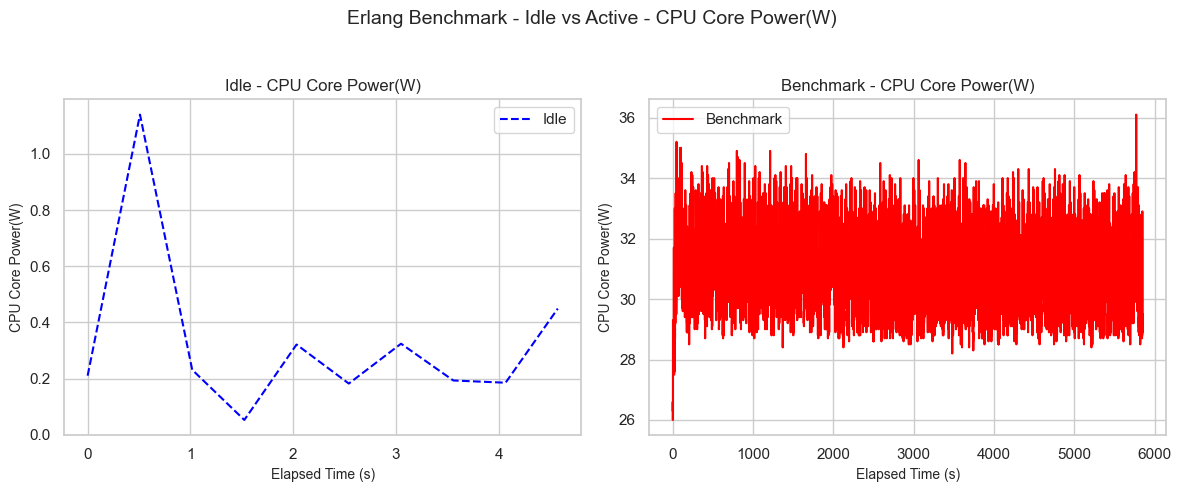

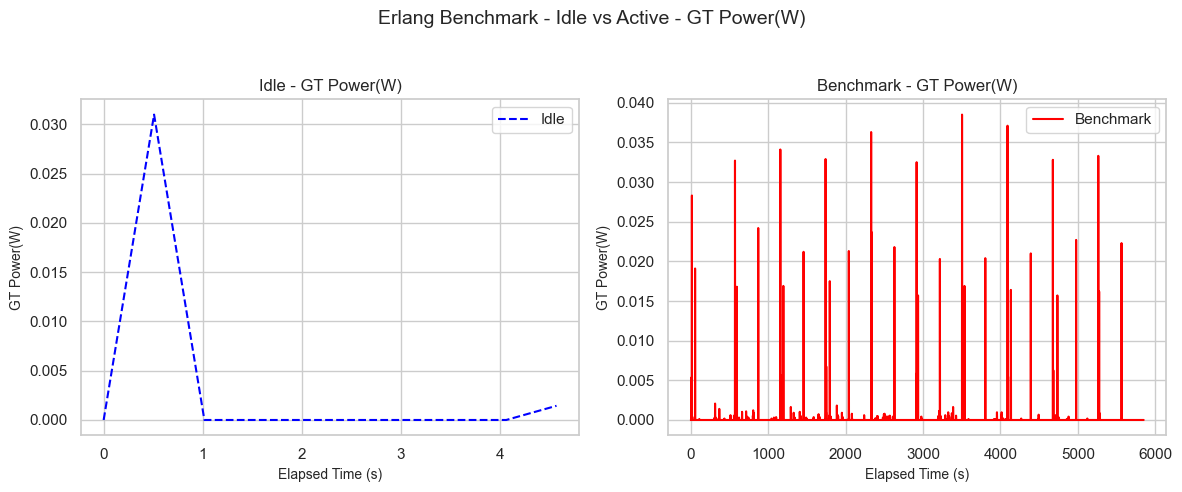

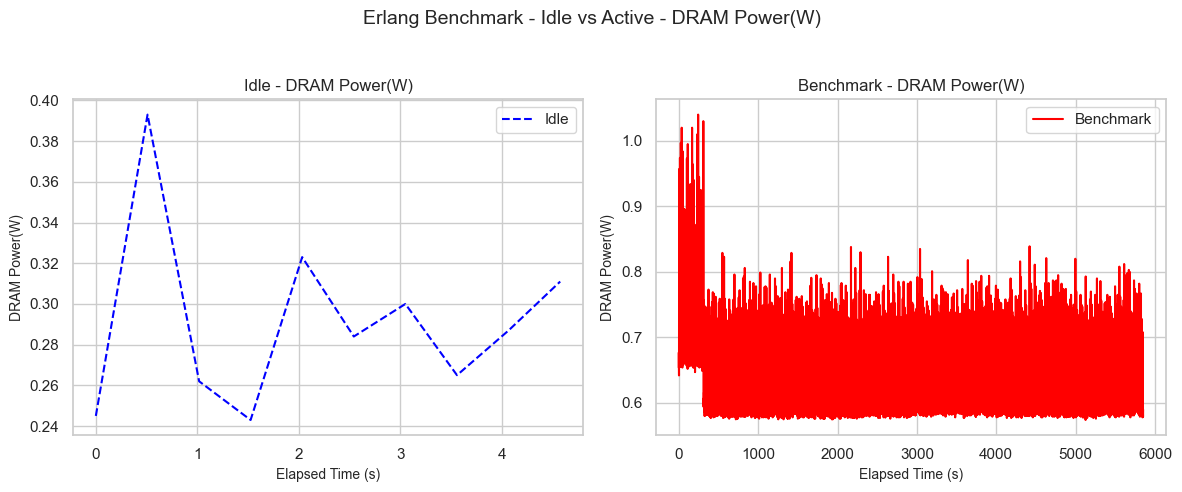

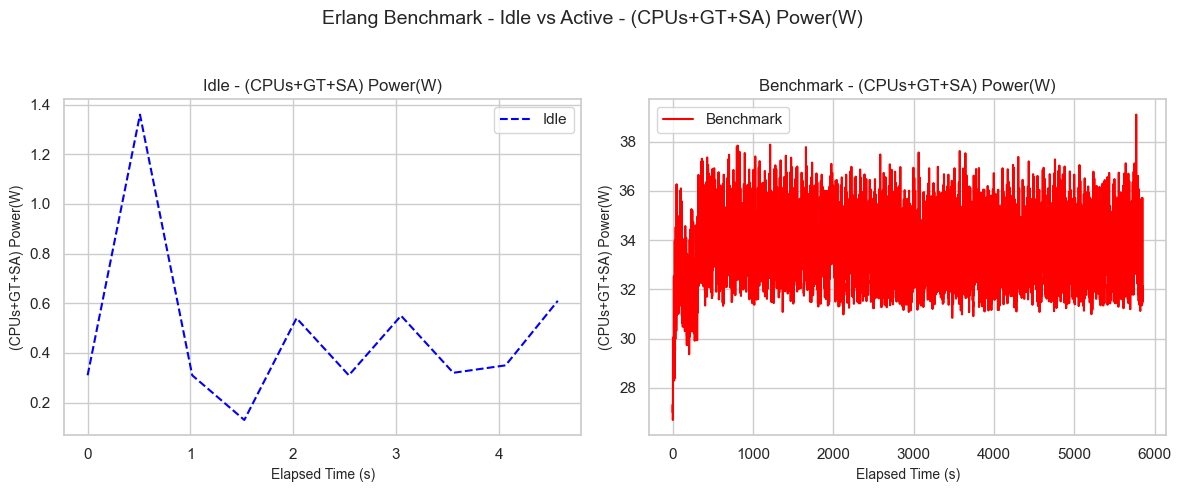

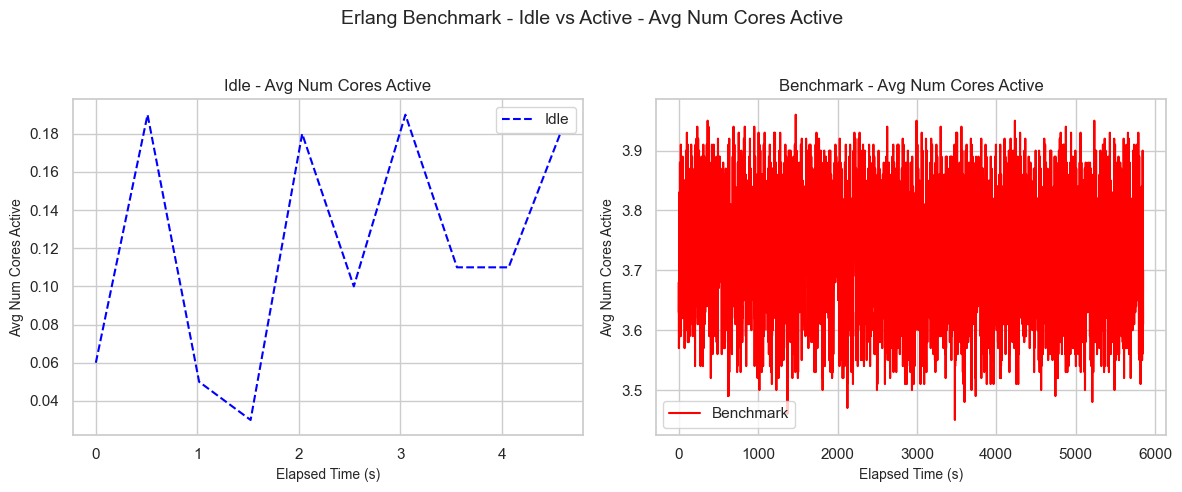

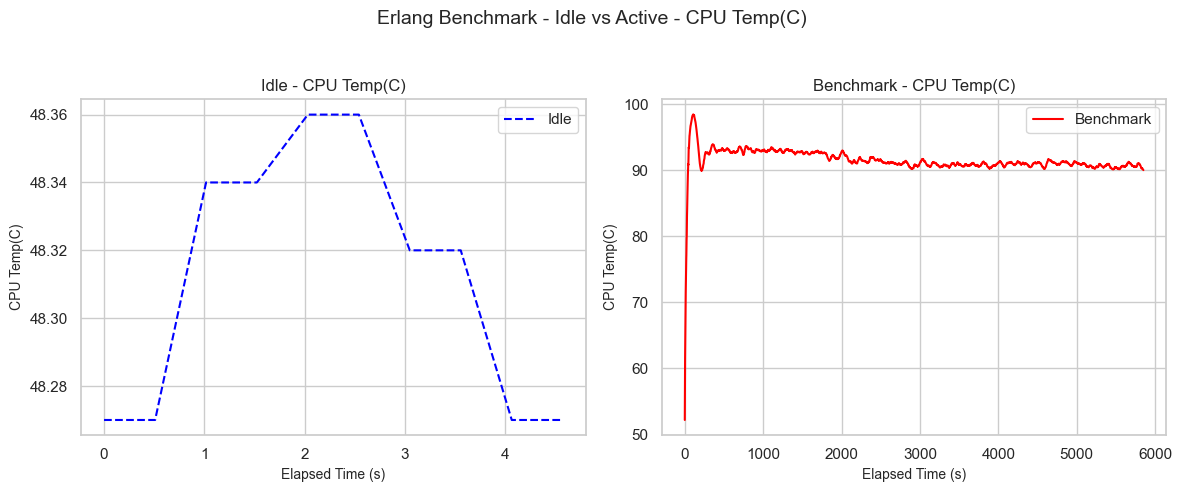

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(n):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if n >= 1_000_000_000:
        return f"{n // 1_000_000_000}B"
    elif n >= 1_000_000:
        return f"{n // 1_000_000}M"
    elif n >= 1_000:
        return f"{n // 1_000}K"
    return str(n)

n = format_number_str(N)
a = format_number_str(A)
title_config_prefix = f"({a} Actors, {n} Messages, {ITERATIONS} Iterations)"

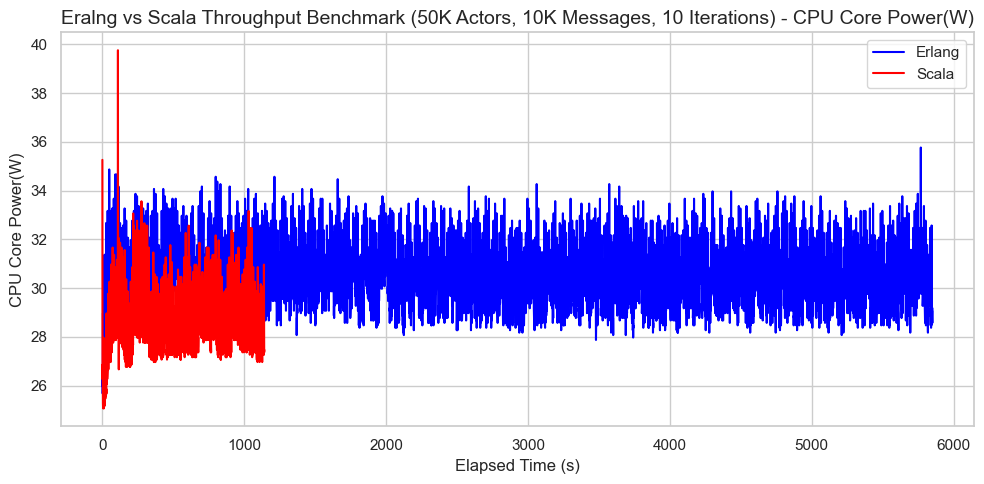

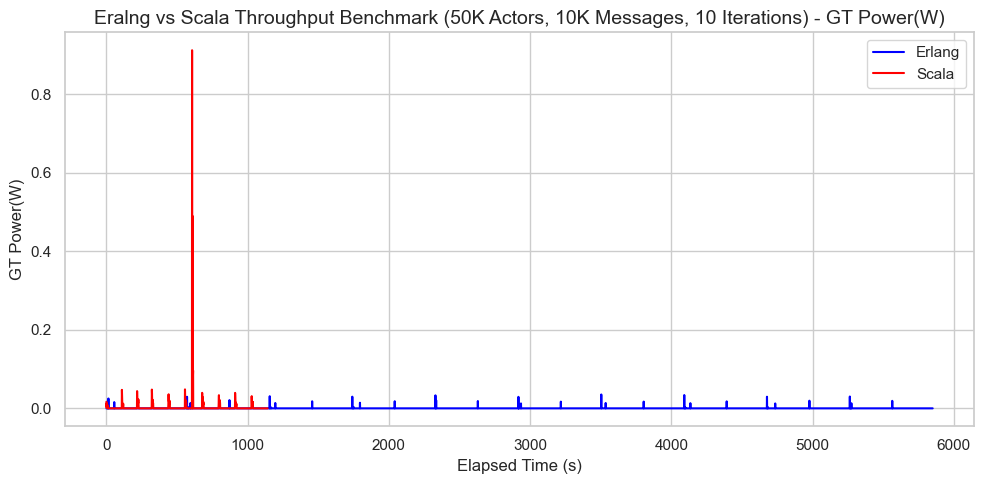

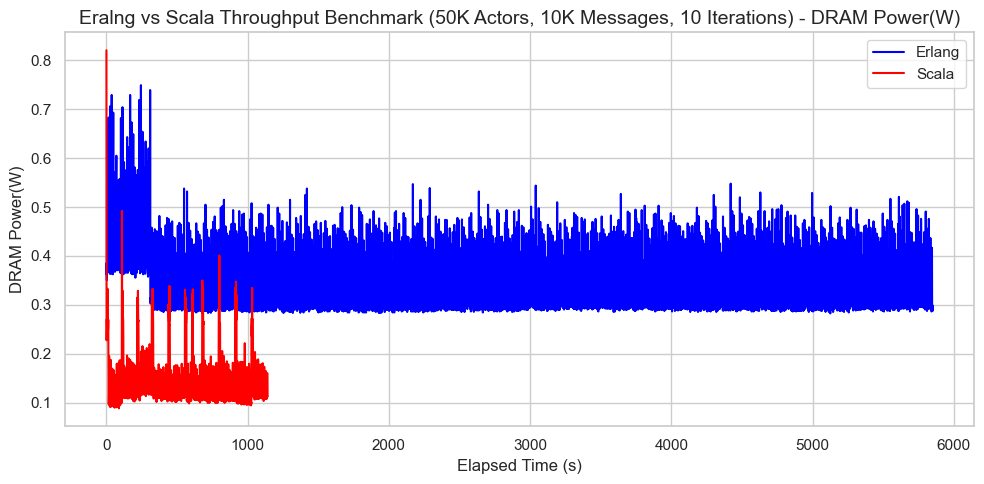

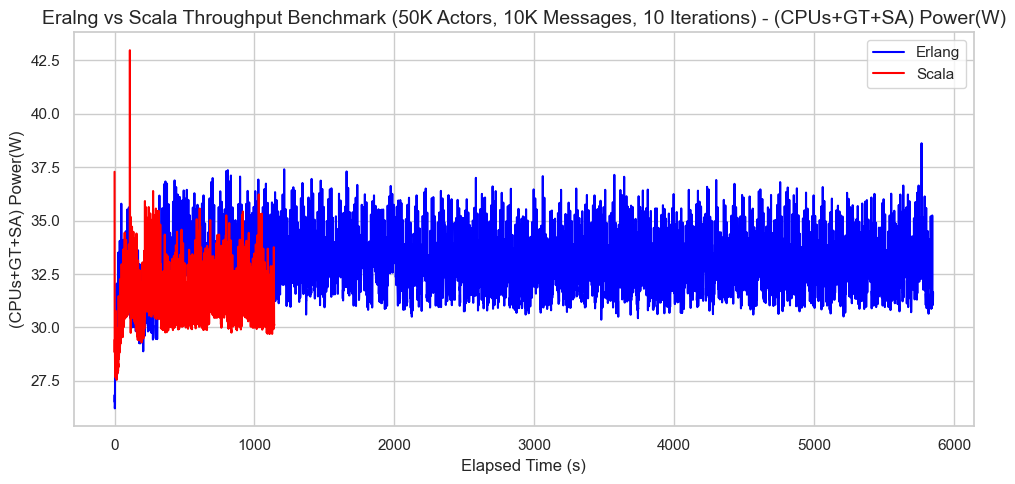

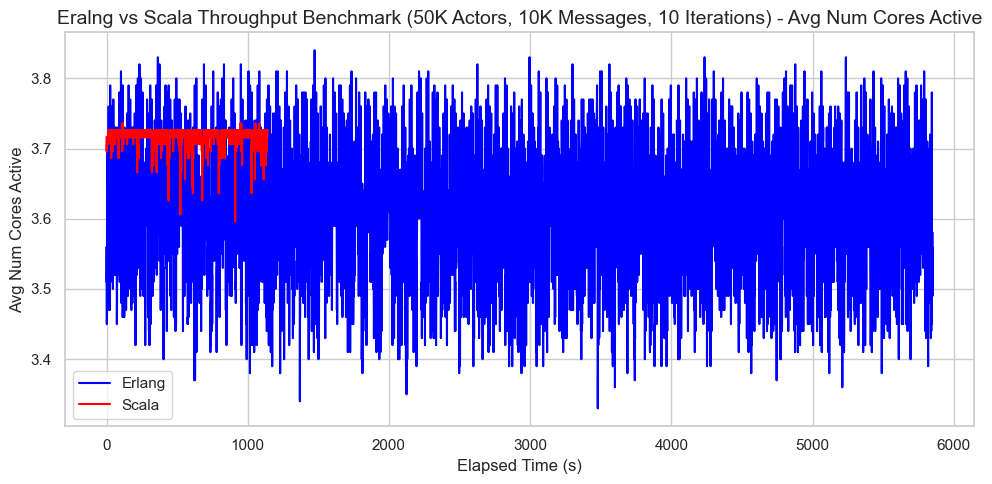

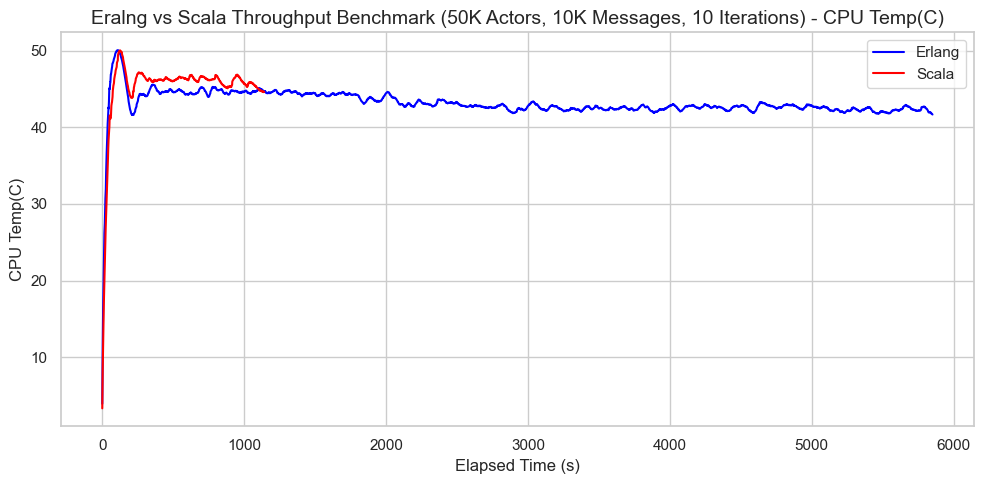

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Throughput Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        28.202428
GT Power(W)              -0.022262
DRAM Power(W)             0.138543
(CPUs+GT+SA) Power(W)    30.950150
CPU Temp(C)              45.261347
Avg Num Cores Active      3.717849
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        30.118412
GT Power(W)              -0.003103
DRAM Power(W)             0.330616
(CPUs+GT+SA) Power(W)    32.566854
CPU Temp(C)              43.201555
Avg Num Cores Active      3.593097
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "A": A,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["A"] == A) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "A =", A, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/fjthrput/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 35361.01146296197 Joules
Erlang Benchmark: 190567.24845829338 Joules
